# T2 - Os fenicios estao chegando 

In [81]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from collections import deque

In [82]:
import time

start = time.time()

# Criamos o Nosso grafo 
G = nx.Graph()

#inicializa variaveis:
finalizado = False
count_coluna = 0
count_linha = 0
cordenadas = ""

while finalizado == False:

    with open("case0.map", "r", encoding="utf-8") as f: # le o mapa 
        mapa = [linha.strip() for linha in f if linha.strip()]

    # Constrói o grafo a partir do mapa
    l, c = mapa[0].split(" ")
    l = int(l) 
    c = int(c) 

    mapa = mapa[1:] # tira a primeira linha 

    for i in range(l): # linha 
        for j in range(c): # coluna 

            valor = mapa[i][j]
            #print(valor)

            if valor != '*': # se é uma terra entao ele nao add um nodo 
                G.add_node((i, j), value=valor)
                if valor.isdigit() == True: # se é um porto add as cordenadas nas cordenadas 
                    cordenadas = cordenadas + "\n" + f"{valor}: i ={i}, j ={j} "
                # Adiciona arestas vizinhos (cima, baixo, esquerda, direita)
                for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]: # add as arestas nos nodos
                    ni, nj = i + dx, j + dy
                    if 0 <= ni < len(mapa) and 0 <= nj < len(mapa[0]): # se os nodos norte sul leste e eoste se existirem e se estao no mapa 
                        if mapa[ni][nj] != '*':
                            G.add_edge((i, j), (ni, nj))
            
                
    print(cordenadas)
    finalizado = True 

    print(f"Nós: {G.number_of_nodes()}")
    print(f"Arestas: {G.number_of_edges()}")


3: i =3, j =43 
5: i =5, j =42 
8: i =6, j =47 
4: i =11, j =45 
2: i =13, j =14 
9: i =14, j =15 
6: i =19, j =14 
7: i =19, j =19 
1: i =24, j =26 
Nós: 939
Arestas: 1518


## Caminho Minimo

Para esse problema nos temos 4 opcoes, porem, as 3 mais conhecidas tem o mesmo problema:
- **BFS** --> busca em largura
- **DFS** 
- **Dijkstra**


Essas espandem para todas as direcoes, passando por muitos vertices desnecessarios. 
Exemplo: (Será salvo um gif q vc pode acessar no mesmo diretorio da pasta com os codigos)

#### **BFS**

Algoritimo:

    enquanto a fila não estiver vazia

    retire um vértice v da fila para cada vizinho w de v

    se w não está numeradoentão numere w

    ponha w na fila

Como cada vértice entra na fila e sai da fila no máximo uma vez, cada arco do grafo é percorrido no máximo uma vez durante a execução do while. Assim, a execução de todas as iteração consome tempo proporcional a A no pior caso.  O resto do código consome tempo proporcional a V.  Portanto, o consumo total de tempo é proporcional a

V + A

no pior caso, supondo que o grafo é representado por um listas de adjacência.  (Se A ≥ V, como acontece em muitas aplicações, podemos dizer que o consumo de tempo é proporcional a A.)  Esse tempo é proporcional ao tamanho do grafo e portanto podemos dizer que GRAPHbfs() é linear.

Se o grafo for representado por matriz de adjacências, uma análise semelhante mostra que o consumo de tempo é proporcional a

V2

no pior caso.  Se nos restrigirmos a grafos densos, esse consumo é linear.



#### **DFS** 
Apesar da semelhança entre a siglas, a busca BFS e a busca DFS são muito diferentes e têm aplicações muito diferentes.

A diferença mais marcante entre as duas buscas está nas estruturas de dados auxiliares empregadas pelas duas estratégias.  A BFS usa uma fila (de vértices), enquanto a DFS usa uma pilha.  (Na versão recursiva da DFS, a pilha não aparece explicitamente porque é administrada pelo mecanismo de recursão.)

Outras diferenças entre os dois algoritmos são mais superficiais:

na BFS, o usuário escolhe o vértice inicial; na DFS o próprio algoritmo escolhe o vértice inicial de cada etapa;
a DFS visita todos os vértices do grafo, enquanto a BFS visita apenas os vértices que estão ao alcance do vértice inicial;
em geral, a DFS é descrita em estilo recursivo enquanto a BFS é descrita em estilo iterativo.



### Encontrar o Caminho Minimo
Como o nosso caminho pode ter ilhas no nosso caminho a melhor opcao é utilizar algo chamado  heurística (distância euclidiana ou de Manhattan)
- A* (A-star) → Como o Dijkstra, mas mais rápido quando você tem uma boa heurística

    1 → 2 → 3 → 4 → 5 → 6 → 7 → 8 → 9 → 1


In [83]:
def manhattan(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])


extraidas = []
cordenadas = cordenadas.split("\n")
count = 0
caminhos_encontrados = False 
i = 0 
num_p_num = []


for item in cordenadas:
    try:
        v = item.split(":")[0].strip()
        coords = item.split(":")[1]
        x = int(coords.split(",")[0].split("=")[1])
        y = int(coords.split(",")[1].split("=")[1])
        extraidas.append((v, (x, y)))

    except IndexError:
        pass

extraidas_ordenadas = sorted(extraidas, key=lambda item: int(item[0]))

for i in range(len(extraidas_ordenadas)):
    if i == len(extraidas_ordenadas) - 1:
            # Último elemento: conecta com o primeiro (fecha o ciclo)
        v_i, (x_i, y_i) = extraidas_ordenadas[i]
        v_f, (x_f, y_f) = extraidas_ordenadas[0]
    else:
        v_i, (x_i, y_i) = extraidas_ordenadas[i]
        v_f, (x_f, y_f) = extraidas_ordenadas[i + 1]

    if nx.has_path(G, (x_i, y_i), (x_f, y_f)) == True:
        caminho = nx.astar_path(G, source=(x_i, y_i), target=(x_f, y_f), heuristic=manhattan, weight='weight')
        num_p_num.append(caminho)
        print(v_i," -> ",v_f, " Caminho encontrado:", caminho)


    else:
        conn = False
        for j in range(i + 2, len(extraidas_ordenadas)):
            v_f, (x_f, y_f) = extraidas_ordenadas[j % len(extraidas_ordenadas)]  # Usa módulo para circular
            if nx.has_path(G, (x_i, y_i), (x_f, y_f)):
                caminho = nx.astar_path(G, source=(x_i, y_i), target=(x_f, y_f), heuristic=manhattan, weight='weight')
                print(v_i, "->", v_f, "Caminho encontrado após tentativa:", caminho)

                num_p_num.append(caminho)
                conn = True
                break  # Encerra o laço ao encontrar um caminho

            if not conn:
                pass
 


1  ->  2  Caminho encontrado: [(24, 26), (25, 26), (25, 25), (25, 24), (25, 23), (24, 23), (24, 22), (24, 21), (24, 20), (24, 19), (24, 18), (24, 17), (24, 16), (24, 15), (24, 14), (23, 14), (22, 14), (21, 14), (21, 13), (20, 13), (19, 13), (18, 13), (17, 13), (16, 13), (15, 13), (14, 13), (13, 13), (13, 14)]
2  ->  3  Caminho encontrado: [(13, 14), (12, 14), (11, 14), (10, 14), (10, 15), (10, 16), (10, 17), (10, 18), (10, 19), (10, 20), (10, 21), (10, 22), (10, 23), (10, 24), (10, 25), (10, 26), (10, 27), (10, 28), (10, 29), (10, 30), (10, 31), (10, 32), (10, 33), (10, 34), (10, 35), (9, 35), (9, 36), (9, 37), (9, 38), (9, 39), (8, 39), (8, 40), (7, 40), (6, 40), (5, 40), (5, 41), (5, 42), (5, 43), (4, 43), (3, 43)]
3  ->  4  Caminho encontrado: [(3, 43), (4, 43), (5, 43), (6, 43), (7, 43), (8, 43), (9, 43), (10, 43), (11, 43), (12, 43), (12, 44), (12, 45), (11, 45)]
4  ->  5  Caminho encontrado: [(11, 45), (12, 45), (12, 44), (12, 43), (11, 43), (10, 43), (9, 43), (8, 43), (7, 43), (

#### Se voce quer plotar o grafico inteiro, troque essas a variavel **i_want** para "YES" :) 

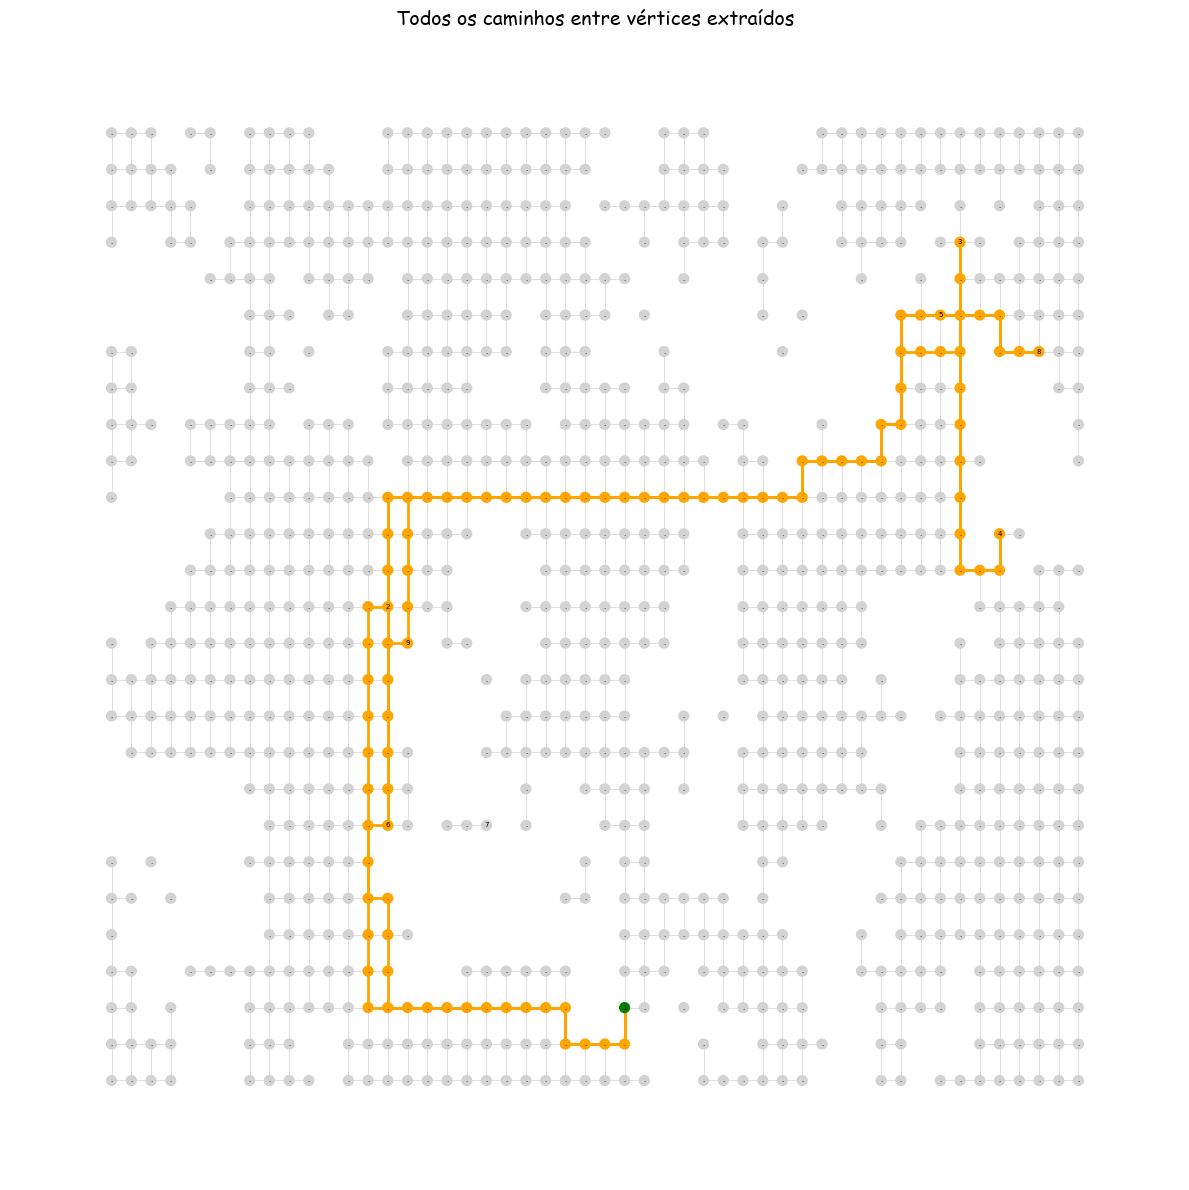

In [84]:
i_want = "YES"  # "YES"
if i_want == "YES":
    pos = {node: (node[1], -node[0]) for node in G.nodes}  # Para desenhar como um mapa 2D
    labels = {node: G.nodes[node]['value'] for node in G.nodes}

    todos_os_nos = set(n for caminho in num_p_num for n in caminho)
    cores = []
    for node in G.nodes:
        if node == num_p_num[0][0]:
            cores.append("green")  # primeiro ponto do primeiro caminho
        elif node == num_p_num[-1][-1]:
            cores.append("red")    # destino final do último caminho
        elif node in todos_os_nos:
            cores.append("orange")
        else:
            cores.append("lightgray")

    plt.figure(figsize=(12, 12))

    # Desenha os nós
    nx.draw_networkx_nodes(G, pos, node_size=50, node_color=cores)

    # Desenha todas as arestas do grafo em cinza claro
    nx.draw_networkx_edges(G, pos, edge_color="lightgray", width=0.5)

    # Desenha as arestas dos caminhos com destaque
    for caminho in num_p_num:
        arestas = list(zip(caminho, caminho[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=arestas, edge_color="orange", width=2)

    # Desenha os rótulos dos nós
    nx.draw_networkx_labels(G, pos, labels, font_size=5)

    plt.title("Todos os caminhos entre vértices extraídos", fontsize=14)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

In [85]:
print(num_p_num)
print(extraidas_ordenadas)

[[(24, 26), (25, 26), (25, 25), (25, 24), (25, 23), (24, 23), (24, 22), (24, 21), (24, 20), (24, 19), (24, 18), (24, 17), (24, 16), (24, 15), (24, 14), (23, 14), (22, 14), (21, 14), (21, 13), (20, 13), (19, 13), (18, 13), (17, 13), (16, 13), (15, 13), (14, 13), (13, 13), (13, 14)], [(13, 14), (12, 14), (11, 14), (10, 14), (10, 15), (10, 16), (10, 17), (10, 18), (10, 19), (10, 20), (10, 21), (10, 22), (10, 23), (10, 24), (10, 25), (10, 26), (10, 27), (10, 28), (10, 29), (10, 30), (10, 31), (10, 32), (10, 33), (10, 34), (10, 35), (9, 35), (9, 36), (9, 37), (9, 38), (9, 39), (8, 39), (8, 40), (7, 40), (6, 40), (5, 40), (5, 41), (5, 42), (5, 43), (4, 43), (3, 43)], [(3, 43), (4, 43), (5, 43), (6, 43), (7, 43), (8, 43), (9, 43), (10, 43), (11, 43), (12, 43), (12, 44), (12, 45), (11, 45)], [(11, 45), (12, 45), (12, 44), (12, 43), (11, 43), (10, 43), (9, 43), (8, 43), (7, 43), (6, 43), (5, 43), (5, 42)], [(5, 42), (5, 41), (5, 40), (6, 40), (7, 40), (8, 40), (8, 39), (9, 39), (9, 38), (9, 37)

### Criar um caminho ponderado e direcionado 

Preciso transforamar cada porto (nodos q tem value) em nodos e todos os outros que quero transformar em uma aresta ponderada que cada nodo siginfica 1 de combustivel 

In [86]:
# Novo grafo direcionado e ponderado
G_portos = nx.DiGraph()

# Adiciona nós (portos)
for v, _ in extraidas_ordenadas:
    G_portos.add_node(v)

# Adiciona arestas com peso baseado na distância do caminho
for caminho in num_p_num:
    origem = caminho[0]
    destino = caminho[-1]
    peso = len(caminho) - 1  # cada passo custa 1 de combustível

    # Recupera o rótulo dos portos pelas coordenadas
    for v, coord in extraidas_ordenadas:
        if coord == origem:
            origem_porto = v
        if coord == destino:
            destino_porto = v

    G_portos.add_edge(origem_porto, destino_porto, weight=peso)

# Exibe o novo grafo de portos com pesos
print("\nGrafo de Portos (direcionado e ponderado):")
for u, v, d in G_portos.edges(data=True):
    print(f"{u} -> {v}, peso = {d['weight']}")



Grafo de Portos (direcionado e ponderado):
1 -> 2, peso = 27
2 -> 3, peso = 39
3 -> 4, peso = 12
4 -> 5, peso = 11
5 -> 6, peso = 42
6 -> 8, peso = 48
8 -> 9, peso = 42
9 -> 1, peso = 27


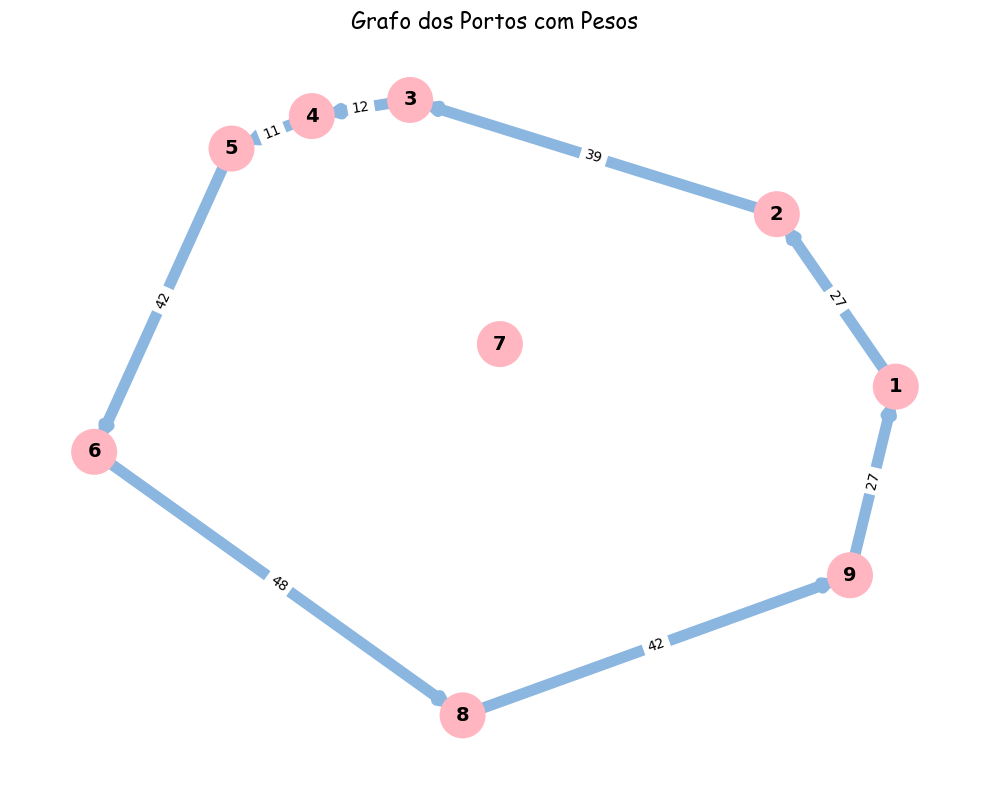

In [87]:
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(figsize=(10, 8))

# Layout de força
pos = nx.kamada_kawai_layout(G_portos)

# Padrão de cores pastel
node_colors = ['#FFB6C1' for _ in G_portos.nodes]  # Rosa claro
edge_colors = ["#8AB6E0" for _ in G_portos.edges]  # Laranja suave

# Tamanhos e larguras
pesos = nx.get_edge_attributes(G_portos, 'weight')

# Fontes amigáveis
plt.rcParams['font.family'] = 'Comic Sans MS'  # Use 'DejaVu Sans' se Comic não estiver disponível

# Nós com borda preta
nx.draw_networkx_nodes(G_portos, pos, node_size=1000, node_color=node_colors, linewidths=1.5)

# Arestas com setas
nx.draw_networkx_edges(
    G_portos, pos,
    width= 8, edge_color=edge_colors,
    arrows=True, arrowstyle='-|>', 

)

# Rótulo dos nós
nx.draw_networkx_labels(G_portos, pos, font_size=14,  font_weight='bold')

# Pesos das arestas
nx.draw_networkx_edge_labels(G_portos, pos, edge_labels=pesos, font_size=10, label_pos=0.5)

# Título e ajustes
plt.title("Grafo dos Portos com Pesos", fontsize=16)
plt.axis("off")
plt.tight_layout()
plt.show()

In [88]:
end = time.time()

print(f"Tempo: {end - start:.6f} segundos")

Tempo: 0.909687 segundos
